<a href="https://colab.research.google.com/github/Nandini-khandelwal2403/SentiMod/blob/main/sentiMod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sentiment Analyser for tweets on twitter.

In [ ]:
!pip install git+https://github.com/tweepy/tweepy.git
!pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-pff_wc9c
  Running command git clone -q https://github.com/tweepy/tweepy.git /tmp/pip-req-build-pff_wc9c
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 20 kB/s 


In [ ]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tweepy
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud 
# tweepy is a library for usinhg twitter api

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
!pip show tweepy
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Name: tweepy
Version: 4.10.1
Summary: Twitter library for Python
Home-page: https://www.tweepy.org/
Author: Joshua Roesslein
Author-email: tweepy@googlegroups.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: oauthlib, requests-oauthlib, requests
Required-by: 


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
client=tweepy.Client(bearer_token="AAAAAAAAAAAAAAAAAAAAAPhVggEAAAAA2z2sxH1wFJMU8W4q9qLijpvOdCk%3DB25xtfvNV23LiDu2ORKC2kpVjFDotLkqO0xP5aULnetr6TmOVC", consumer_key="mP5jY9dc6M7mIw1sIgPrp5ajf", consumer_secret="zWLwyxYuXm8AOiGHy6QRkjiJVxL4UvhsVuykYNOAnPvXgEj4eI", access_token="1325105840362192897-4bfJbM9ZnlrcCCwLQjhqcqsaV5t88r",  wait_on_rate_limit=False)
# query = "news"
# tweets = client.search_recent_tweets(query=query, max_results=10)
# print(tweets)

In [ ]:
username = "nandini2403"
id = client.get_user(username=username).data.id   # we need to do .data.id to get id from users data

tweets = client.get_users_tweets(id = id, max_results=100)
liked_tweets = client.get_liked_tweets(id=id, max_results=100)
print(tweets)
print(liked_tweets)

Response(data=[<Tweet id=1568254388321538049 text="@Debajyoti0901 I'll still run yours as well 😂\nAnyway, thank you so much🤩 and i will surely make it an open source tool✌️">, <Tweet id=1567269798354059268 text='@Debajyoti0901 Thank you so much 😄'>, <Tweet id=1567245158936383488 text='Got to know the most used word in my own, and my liked tweets by analysing them using the sentiment analyzer made by me. Can\'t believe that "Oh" is mostly used by me in my tweets, and tweets with words "Thank" and "pain" are mostly liked by me😂. https://t.co/YuSAi0jgUZ'>, <Tweet id=1566850911582167041 text='@Debajyoti0901 Oh no😂'>, <Tweet id=1566720884068474880 text='Can anyone believe that applying for a transcript in college can charge you 1000rs ??\nYeah, my college does that.'>, <Tweet id=1566716874674814982 text='Very tiring day + frustration + overthinking. I hope the remaining hours are normal. \nAhhh....Ineed to sleep 😩'>, <Tweet id=1563987905689055232 text="I made a promise today.\nI'll definite

In [ ]:
tweets_df = pd.DataFrame(tweets.data)   #we pass array or dictionary in data frame 
likedTweets_df = pd.DataFrame(liked_tweets.data)
# pd.set_option('display.max_colwidth', 2)
# print(tweets_df.columns)

In [ ]:
tweets_df

,id,text
0,1568254388321538049,@Debajyoti0901 I'll still run yours as well 😂\...
1,1567269798354059268,@Debajyoti0901 Thank you so much 😄
2,1567245158936383488,"Got to know the most used word in my own, and ..."
3,1566850911582167041,@Debajyoti0901 Oh no😂
4,1566720884068474880,Can anyone believe that applying for a transcr...
...,...,...
95,1512748132081143812,@The_player_9 Same with me😅
96,1508417740029440004,@Debajyoti0901 I wanna start my day by executi...
97,1508354795358208002,Waiting for the classes to get over to start w...
98,1508289353109614592,@debadyutitech 😅😅


In [ ]:
likedTweets_df

,id,text
0,1567260027521482757,@nandini2403 Amazing finding though... this ca...
1,1566941133837565952,My everyday pain right now 🥲 https://t.co/YyxY...
2,1566806651793018881,@nandini2403 My undergrad college charged me 2...
3,1566486555065450496,Did everyone watch the match 💀💀
4,1564016249851576320,@nandini2403 The end goal is to move forward w...
...,...,...
95,1524739858673012739,Received first stipend from first internship 🥺❤️🧿
96,1524753309948518402,Leetcode Chris Gayle 😁 https://t.co/KSxZxjfULt
97,1524334287259987969,I just touched 5k+ followers on Twitter.💝\nTha...
98,1524415780812517377,Maturity is when you realise pass hona zaroori...


In [ ]:
#performing cleanup activity
#1 iterating on values of a column

def cleanUpTweet(txt):
  #remove mentions
  txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
  # re #
  txt = re.sub(r'#[A-Z0-9]+', '', txt)
  # Remove retweets
  txt = re.sub(r'RT : ', '', txt)
  # Remove urls
  txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
  #remove amp
  txt = re.sub(r'&amp;', '', txt)
  #rempve strange characters
  txt = re.sub(r'ðŸ™', '', txt)
  #remove new lines
  txt = re.sub(r'\n', ' ', txt)
  return txt

# print(tweets_df.text)
i=0
for text in tweets_df.text:
    tweets_txt = cleanUpTweet(text)
    # print(tweets_df.at[i, 'text'])
    tweets_df.at[i, 'text'] = tweets_txt

    # tweets_df.loc[i,['text']]=tweets_txt
    # tweets_df.at[i,'text']=tweets_txt
    i+=1
print(tweets_df)

j=0
for text in likedTweets_df.text:
    likedTweets_txt = cleanUpTweet(text)
    # print(tweets_df.at[i, 'text'])
    likedTweets_df.at[j, 'text'] = likedTweets_txt

    # tweets_df.loc[i,['text']]=tweets_txt
    # tweets_df.at[i,'text']=tweets_txt
    j+=1
print(likedTweets_df)

                     id                                               text
0   1568254388321538049   I'll still run yours as well 😂 Anyway, thank ...
1   1567269798354059268                                Thank you so much 😄
2   1567245158936383488  Got to know the most used word in my own, and ...
3   1566850911582167041                                             Oh no😂
4   1566720884068474880  Can anyone believe that applying for a transcr...
..                  ...                                                ...
95  1512748132081143812                                      Same with me😅
96  1508417740029440004   I wanna start my day by executing my day plan...
97  1508354795358208002  Waiting for the classes to get over to start w...
98  1508289353109614592                                                 😅😅
99  1507948507902066692                                              Hehe😅

[100 rows x 2 columns]
                     id                                               text
0

In [ ]:
#update cleanup tweets in the dataframe
for text in tweets_df.text:
  print(text)

for text in likedTweets_df.text:
  print(text)

 I'll still run yours as well 😂 Anyway, thank you so much🤩 and i will surely make it an open source tool✌️
 Thank you so much 😄
Got to know the most used word in my own, and my liked tweets by analysing them using the sentiment analyzer made by me. Can't believe that "Oh" is mostly used by me in my tweets, and tweets with words "Thank" and "pain" are mostly liked by me😂. 
 Oh no😂
Can anyone believe that applying for a transcript in college can charge you 1000rs ?? Yeah, my college does that.
Very tiring day + frustration + overthinking. I hope the remaining hours are normal.  Ahhh....Ineed to sleep 😩
I made a promise today. I'll definitely make that happen one day.✊
Sometimes letting things out and that too in a fight with someone who knows, understands and forgives you after that, really makes you feel light and happy at times.😀
A good day after so many days💙💙.
 Congratulations Boss 🥳🥳 You just killed it !!
Yesterday I got my dream offer 😭😭 3 years of hard work was worth it!!
 True
Be

In [ ]:
#sentiment analysis of tweets
for index, row in tweets_df.text.iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  if score['neg'] > score['pos']:
    tweets_df.loc[index,"sentiment"] = "negative"
  elif score['pos'] > score['neg']:
    tweets_df.loc[index,"sentiment"] = "postive"
  else:
    tweets_df.loc[index,"sentiment"] = "neutral"

for index, row in likedTweets_df.text.iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  if score['neg'] > score['pos']:
    likedTweets_df.loc[index,"sentiment"] = "negative"
  elif score['pos'] > score['neg']:
    likedTweets_df.loc[index,"sentiment"] = "postive"
  else:
    likedTweets_df.loc[index,"sentiment"] = "neutral"
# print(tweets_df)    

In [ ]:
# tweets_df
for i,row in tweets_df.iterrows():
  print(row.sentiment, row.text)

for i,row in likedTweets_df.iterrows():
  print(row.sentiment, row.text)

postive  I'll still run yours as well 😂 Anyway, thank you so much🤩 and i will surely make it an open source tool✌️
postive  Thank you so much 😄
postive Got to know the most used word in my own, and my liked tweets by analysing them using the sentiment analyzer made by me. Can't believe that "Oh" is mostly used by me in my tweets, and tweets with words "Thank" and "pain" are mostly liked by me😂. 
neutral  Oh no😂
postive Can anyone believe that applying for a transcript in college can charge you 1000rs ?? Yeah, my college does that.
negative Very tiring day + frustration + overthinking. I hope the remaining hours are normal.  Ahhh....Ineed to sleep 😩
postive I made a promise today. I'll definitely make that happen one day.✊
postive Sometimes letting things out and that too in a fight with someone who knows, understands and forgives you after that, really makes you feel light and happy at times.😀
postive A good day after so many days💙💙.
negative  Congratulations Boss 🥳🥳 You just killed it

In [ ]:
# create new data frame for all sentiment
tweet_neg = tweets_df[tweets_df["sentiment"] == "negative"]
tweet_pos = tweets_df[tweets_df["sentiment"] == "postive"]
tweet_neu = tweets_df[tweets_df["sentiment"] == "neutral"]

likedTweet_neg = tweets_df[tweets_df["sentiment"] == "negative"]
likedTweet_pos = tweets_df[tweets_df["sentiment"] == "postive"]
likedTweet_neu = tweets_df[tweets_df["sentiment"] == "neutral"]

# calculate function for all sentiment
def cal_percentage(x, y):
  return x/y * 100

pos_per = cal_percentage(len(likedTweet_pos), len(tweets_df))
neg_per = cal_percentage(len(likedTweet_neg), len(tweets_df))
neu_per = cal_percentage(len(likedTweet_neu), len(tweets_df))

print("positive: {} {}%".format(len(tweet_pos), format(pos_per, '.1f')))
print("negative: {} {}%".format(len(tweet_neg), format(neg_per, '.1f')))
print("neutral: {} {}%".format(len(tweet_neu), format(neu_per, '.1f')))

poslik_per = cal_percentage(len(likedTweet_pos), len(likedTweets_df))
neglik_per = cal_percentage(len(likedTweet_neg), len(likedTweets_df))
neulik_per = cal_percentage(len(likedTweet_neu), len(likedTweets_df))

print("positive: {} {}%".format(len(likedTweet_pos), format(poslik_per, '.1f')))
print("negative: {} {}%".format(len(likedTweet_neg), format(neglik_per, '.1f')))
print("neutral: {} {}%".format(len(likedTweet_neu), format(neulik_per, '.1f')))

positive: 55 55.0%
negative: 8 8.0%
neutral: 37 37.0%
positive: 55 55.0%
negative: 8 8.0%
neutral: 37 37.0%


<function matplotlib.pyplot.show(*args, **kw)>

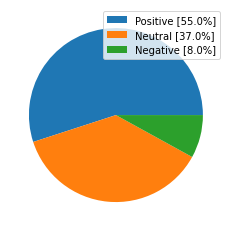

In [ ]:
sizes = [len(tweet_pos), len(tweet_neu), len(tweet_neg)]
labels = ['Positive ['+format(pos_per, '.1f')+'%]', 'Neutral ['+format(neu_per,'.1f')+'%]', 'Negative ['+format(neg_per,'.1f')+'%]']
# patches, texts = plt.pie(sizes, colors=colors, shadow = True, startangle = 90)
plt.pie(sizes)
plt.legend(labels)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

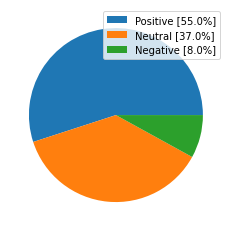

In [ ]:
sizes_lik = [len(likedTweet_pos), len(likedTweet_neu), len(likedTweet_neg)]
labels_lik = ['Positive ['+format(poslik_per, '.1f')+'%]', 'Neutral ['+format(neulik_per,'.1f')+'%]', 'Negative ['+format(neglik_per,'.1f')+'%]']
# patches, texts = plt.pie(sizes, colors=colors, shadow = True, startangle = 90)
plt.pie(sizes_lik)
plt.legend(labels_lik)
plt.show

In [ ]:
# for tweet in tweets_df.text:
#   print(text)

# def convert_emojis(text):
#   for emot in UNICODE_EMOJI:
#     text = text.replace(emot, '_'.join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
#   return text

# for index, tweet in tweets_df.iterrows():
#   #  print(tweet.text)
#    tweets_df.loc[index,"no_emoji"] = convert_emojis(tweet.text);
# # print(tweets_df)

# for i,row in tweets_df.iterrows():
#   print(row.text)

def convert_emojis(text):
  for emot in UNICODE_EMOJI:
    text = text.replace(emot, '_'.join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
  return text

for index, tweet in tweets_df.text.iteritems():
  #  print(tweet.text)
  #  tweets_df.loc[index,"no_emoji"] = 
   tweets_df.loc[index,"no_emoji"] = convert_emojis(tweet)
print(tweets_df.no_emoji)

0      I'll still run yours as well face_with_tears_...
1      Thank you so much grinning_face_with_smiling_...
2     Got to know the most used word in my own, and ...
3                           Oh noface_with_tears_of_joy
4     Can anyone believe that applying for a transcr...
                            ...                        
95                 Same with megrinning_face_with_sweat
96     I wanna start my day by executing my day plan...
97    Waiting for the classes to get over to start w...
98     grinning_face_with_sweatgrinning_face_with_sweat
99                         Hehegrinning_face_with_sweat
Name: no_emoji, Length: 100, dtype: object


In [ ]:
stop_words = set(stopwords.words('english'))
for i, tweet in tweets_df.iterrows():
  word_tokens = word_tokenize(tweet.text)
  filtered_sentence = []
  for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
  print(" ".join(word_tokens))
  print(" ".join(filtered_sentence))

I 'll still run yours as well 😂 Anyway , thank you so much🤩 and i will surely make it an open source tool✌️
I 'll still run well 😂 Anyway , thank much🤩 surely make open source tool✌️
Thank you so much 😄
Thank much 😄
Got to know the most used word in my own , and my liked tweets by analysing them using the sentiment analyzer made by me . Ca n't believe that `` Oh '' is mostly used by me in my tweets , and tweets with words `` Thank '' and `` pain '' are mostly liked by me😂 .
Got know used word , liked tweets analysing using sentiment analyzer made . Ca n't believe `` Oh '' mostly used tweets , tweets words `` Thank '' `` pain '' mostly liked me😂 .
Oh no😂
Oh no😂
Can anyone believe that applying for a transcript in college can charge you 1000rs ? ? Yeah , my college does that .
Can anyone believe applying transcript college charge 1000rs ? ? Yeah , college .
Very tiring day + frustration + overthinking . I hope the remaining hours are normal . Ahhh .... Ineed to sleep 😩
Very tiring day + 

In [ ]:
nlp = spacy.load('en_core_web_sm')
for i, tweet in tweets_df.iterrows():
  sentence = nlp(tweet.text)
  print(sentence)
  
  notStopWords = [notStopWords.text for notStopWords in sentence if not notStopWords.is_stop]       #meaning
  print(" ".join(notStopWords))
  tweets_df.loc[i,"rm_stopwords"] = (" ".join(notStopWords))
  # stopWords = [stopWords.text for stopWords in sentence if stopWords.is_stop]
  # print(stopWords)
# print(tweets_df)

for i, tweetlik in likedTweets_df.iterrows():
  sentence = nlp(tweetlik.text)
  print(sentence)
  
  notStopWords = [notStopWords.text for notStopWords in sentence if not notStopWords.is_stop]       #meaning
  print(" ".join(notStopWords))
  likedTweets_df.loc[i,"rm_stopwords"] = (" ".join(notStopWords))
  # stopWords = [stopWords.text for stopWords in sentence if stopWords.is_stop]
  # print(stopWords)

 I'll still run yours as well 😂 Anyway, thank you so much🤩 and i will surely make it an open source tool✌️
  run 😂 , thank 🤩 surely open source tool ✌ ️
 Thank you so much 😄
  Thank 😄
Got to know the most used word in my own, and my liked tweets by analysing them using the sentiment analyzer made by me. Can't believe that "Oh" is mostly used by me in my tweets, and tweets with words "Thank" and "pain" are mostly liked by me😂. 
Got know word , liked tweets analysing sentiment analyzer . believe " Oh " tweets , tweets words " Thank " " pain " liked 😂 .
 Oh no😂
  Oh 😂
Can anyone believe that applying for a transcript in college can charge you 1000rs ?? Yeah, my college does that.
believe applying transcript college charge 1000rs ? ? Yeah , college .
Very tiring day + frustration + overthinking. I hope the remaining hours are normal.  Ahhh....Ineed to sleep 😩
tiring day + frustration + overthinking . hope remaining hours normal .   Ahhh .... Ineed sleep 😩
I made a promise today. I'll defin

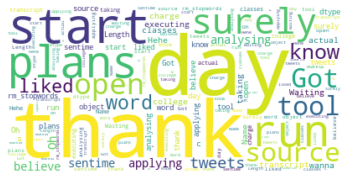

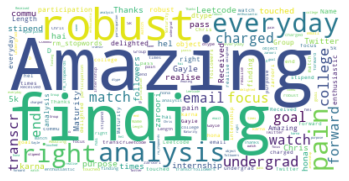

In [ ]:
def create_wordcloud(text):
    # stopwords = set(STOPWORDS)
    wc = WordCloud(background_color = "white", max_words = 3000, repeat = True)
    wc.generate(str(text))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
#word cloud for positive sentiments
create_wordcloud(tweets_df.rm_stopwords)
#wordcloud for negative sentimenst
create_wordcloud(likedTweets_df.rm_stopwords)

In [ ]:
import re
import pickle
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

In [ ]:
with open('/downloads/Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}


FileNotFoundError: ignored

In [ ]:
def convert_emojis(text):
  for emot in UNICODE_EMOJI:
    text = text.replace(emot, '_'.join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
  return text

for tweet in tweets_df.text:
  t = convert_emojis(tweet);
  print(t)

 I'll still run yours as well face_with_tears_of_joy Anyway, thank you so muchstar-struck and i will surely make it an open source toolvictory_hand️
 Thank you so much grinning_face_with_smiling_eyes
Got to know the most used word in my own, and my liked tweets by analysing them using the sentiment analyzer made by me. Can't believe that "Oh" is mostly used by me in my tweets, and tweets with words "Thank" and "pain" are mostly liked by meface_with_tears_of_joy. 
 Oh noface_with_tears_of_joy
Can anyone believe that applying for a transcript in college can charge you 1000rs ?? Yeah, my college does that.
Very tiring day + frustration + overthinking. I hope the remaining hours are normal.  Ahhh....Ineed to sleep weary_face
I made a promise today. I'll definitely make that happen one day.raised_fist
Sometimes letting things out and that too in a fight with someone who knows, understands and forgives you after that, really makes you feel light and happy at times.grinning_face
A good day af

In [ ]:
# Python3 Program to find the minimum number of
# adjacent swaps to arrange similar items together

# Function to find minimum swaps
def findMinimumAdjacentSwaps(arr, N) :
	
	# visited array to check if value is seen already
	visited = [False] * (N + 1)

	minimumSwaps = 0

	for i in range(2 * N) :
		# if (arr[i] not in [1, 2]) :
		# 	continue
		# If the arr[i] is seen first time
		if (visited[arr[i]] == False) :
			visited[arr[i]] = True

			# stores the number of swaps required to
			# find the correct position of current
			# element's partner
			count = 0

			for j in range( i + 1, 2 * N) :

				# Increment count only if the current
				# element has not been visited yet (if is
				# visited, means it has already been placed
				# at its correct position)
				if (visited[arr[j]] == False) :
					count += 1

				# If current element's partner is found
				elif (arr[i] == arr[j]) :
					minimumSwaps += count
		
	return minimumSwaps


# Driver Code
if __name__ == "__main__" :

	arr = [ 1, 3, 1, 2, 4, 1, 2 ]
	N = len(arr)
	N //= 2

	print(findMinimumAdjacentSwaps(arr, N))

# This code is contributed by Ryuga


IndexError: ignored